# Backpropagation
## Problem A

$V_{0,1} = x_{1}$ <br>
$V_{0,2} = x_{2}$ <br>
$V_{1,1} = σ (W_{0,1,1}*V_{0,1}+W_{0,1,2}*V_{0,2})$ <br>
$V_{1,2} = σ (W_{0,2,1}*V_{0,1}+W_{0,2,2}*V_{0,2})$ <br>
$V_{2,1} = W_{1,1,1}*V_{1,1} + W_{1,1,2}*V_{1,2}$ <br>
$N(x) = V_{2,1}$ <br> OR <br>
$N(x)=W_{1,1,1}*σ (W_{0,1,1}*x_{1}+W_{0,1,2}*x_{2}) + W_{1,1,2}*σ (W_{0,2,1}*x_{1}+W_{0,2,2}*x_{2})$

## Problem B

$l(N(·),(x, t)) = \frac{1}{2}(N(x) - t )^2$ <br>
$l(N(·),(x, t))= \frac{1}{2}( (W_{1,1,1}*σ (W_{0,1,1}*x_{1}+W_{0,1,2}*x_{2}) + W_{1,1,2}*σ (W_{0,2,1}*x_{1}+W_{0,2,2}*x_{2})) - t )^2$ <br><br>

$L(W_{0,1,1},W_{0,2,1},W_{0,1,2},W_{0,2,2},W_{1,1,1},W_{1,1,2}) = \frac{1}{N} \sum l(N(·),(x, t))$<br>
$L(W_{0,1,1},W_{0,2,1},W_{0,1,2},W_{0,2,2},W_{1,1,1},W_{1,1,2}) = \frac{1}{N} \sum \frac{1}{2}((W_{1,1,1}*σ (W_{0,1,1}*x_{1}+W_{0,1,2}*x_{2}) + W_{1,1,2}*σ (W_{0,2,1}*x_{1}+W_{0,2,2}*x_{2})) - t )^2$ 

## Problem C
#### $\frac{∂L}{∂o_{2,1}} = 2((W_{1,1,1}*σ (W_{0,1,1}*x_{1}+W_{0,1,2}*x_{2}) + W_{1,1,2}*σ (W_{0,2,1}*x_{1}+W_{0,2,2}*x_{2})) - t)$
#### $\frac{∂o_{2,1}}{∂w_{1,1,1}} = σ (W_{0,1,1}*x_{1}+W_{0,1,2}*x_{2})$
#### $\frac{∂L}{∂w_{1,1,1}} = \frac{∂L}{∂o_{2,1}}\frac{∂o_{2,1}}{∂w_{1,1,1}}$ <br>


#### $\frac{∂o_{2,1}}{∂w_{1,1,2}} = σ (W_{0,2,1}*x_{1}+W_{0,2,2}*x_{2})$
#### $\frac{∂L}{∂w_{1,1,2}} = \frac{∂L}{∂o_{2,1}}\frac{∂o_{2,1}}{∂w_{1,1,2}}$  <br>

#### $ \frac{∂o_{2,1}}{∂o_{1,1}} = W_{1,1,1}$
#### $\frac{∂L}{∂w_{0,1,1}} = \frac{∂L}{∂o_{2,1}}\frac{∂o_{2,1}}{∂o_{1,1}}\frac{∂o_{1,1}}{∂w_{0,1,1}}$
#### $\frac{∂L}{∂w_{0,1,2}} = \frac{∂L}{∂o_{2,1}}\frac{∂o_{2,1}}{∂o_{1,1}}\frac{∂o_{1,1}}{∂w_{0,1,2}}$<br>


#### $\frac{∂o_{2,1}}{∂o_{1,2}} = W_{1,1,2}$
#### $\frac{∂L}{∂w_{0,2,1}} = \frac{∂L}{∂o_{2,1}}\frac{∂o_{2,1}}{∂o_{1,2}}\frac{∂o_{1,2}}{∂w_{0,2,1}}$
#### $\frac{∂L}{∂w_{0,2,1}} = \frac{∂L}{∂o_{2,1}}\frac{∂o_{2,1}}{∂o_{1,2}}\frac{∂o_{1,2}}{∂w_{0,2,2}}$

# K-means algorithm.
## Problem A

In [698]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import math

# Find the the cluster of each data point using K-means
# Parameters:
# X - is the input data
# ic - is the initial center
# iters - is the maximum iterations
# plot_progress - if True plots a figure of the data after each iteration
def Kmeans(X,centroids,iters=1,plot_progress=None):
    m,n=X.shape
    K=centroids.shape[0]
    previous_centroids=np.zeros((iters, centroids.shape[0], centroids.shape[1]))
    idx=np.zeros(m)
    for i in range (iters):
        previous_centroids[i,:]=centroids
        idx=find_closest_center(X,centroids)
        centroids = computecentroids(X, idx, K)
        if plot_progress:
            plotdatapts(X, idx, K, f'K={len(centroids)}', i=i+1)
    return centroids, idx

# Compute the closest center to the datapoints
def find_closest_center(X, center):
    m=X.shape[0]
    idx=np.zeros(m)
    for i in range (m):
        dist=np.square(np.sum(abs(X[i,:]-center)**2,axis=1))
        idx[i]=np.argmin(dist)           
    return idx
            
# plots 2d datapoints
def plotdatapts(X,idx,K,t,centers=np.zeros((1,1)), i=None):
    if i == None:
        plt.title(t)
    else:
        plt.title(f'{t} interation={i}')
    color=cm.rainbow(np.linspace(0,1,K))
    plt.scatter(X[:,0],X[:,1],c=color[idx.astype(int),:])
    if centers.shape[1] > 1:
        plt.scatter(centers[:,0],centers[:,1],c='g', marker='+')
    
# plots 3d datapoints
def plotdatapts3d(X,idx,K,i=None):
    fig = plt.figure(figsize=(6,4))
    ax = Axes3D(fig)
    if i != None:
        plt.title(i)
    color=cm.rainbow(np.linspace(0,1,K))
    ax.scatter(X[:,0],X[:,1],X[:,2],c=color[idx.astype(int),:], marker='o')

# Compute the center by computing the mean of every cluster as a new center
def computecentroids(X,idx,K):
    m,n=X.shape
    centroids=np.zeros((K,n))
    for i in range (K):
        x=X[idx==i]
        if x.shape[0]>0:
            avg=np.mean(x,axis=0)
            centroids[i,:]=avg
    return centroids

# Compute the k-means cost for the clustering induced by given centers
def calculate_cost(X, idx, centroids):
    cost = 0
    for i in range(math.floor(idx.max())+1):
        datapoints = np.where(idx == i)
        center = centroids[i]
        for j in range(len(datapoints[0])):
            cost+=np.square(np.sum(abs(X[datapoints[0][j]] - center)**2))
    return cost

## Problem B

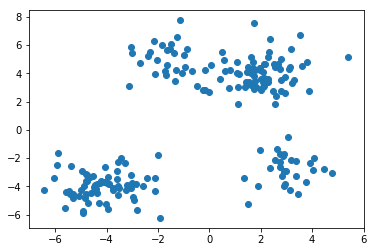

In [699]:
X = np.loadtxt('twodpoints.txt', delimiter=',')
plt.scatter(X[:,0], X[:,1])

##### Looking at the datapoints, 3 clusters would be suitable for this databpoints. 1 cluster located on the top, and 2 at the bottom of the graph. However, you can also argue that the 1 cluster located on the top side of the graph can be two distict clusters. One on the top left and the other other on the top right side of the graph. In that case we will end up with 4 clusters. Although, 4 clusters are plusable, the top clusters does not seem through visual inspection to have far enough centers for them to be distinct (relatively speaking). Below are two plots for K-means algorithm using 2 different manually selected centers for 3 and 4 clusters. Plots below show that indeed the datapoints are better clustered using 4 clusters rather than 3.

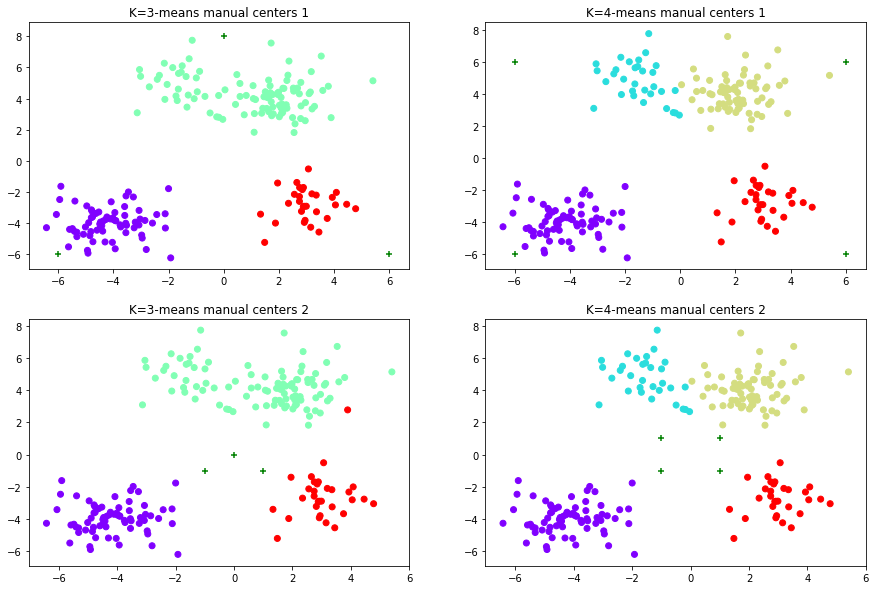

In [700]:
plt.figure(figsize=(15,10))
K=3
initial_centroids = np.array([[-6, -6], [0, 8], [6, -6]])
centroids, idx = Kmeans(X, initial_centroids)
plt.subplot(2, 2, 1)
plotdatapts(X, idx, K, f"K=3-means manual centers 1",  initial_centroids)

K=4
initial_centroids = np.array([[-6, -6], [-6,6],[6, 6], [6, -6]])
centroids, idx = Kmeans(X, initial_centroids)
plt.subplot(2, 2, 2)
plotdatapts(X, idx, K, f"K=4-means manual centers 1",  initial_centroids)

K=3
initial_centroids = np.array([[-1, -1], [0, 0], [1, -1]])
centroids, idx = Kmeans(X, initial_centroids)
plt.subplot(2, 2, 3)
plotdatapts(X, idx, K, f"K=3-means manual centers 2",  initial_centroids)

K=4
initial_centroids = np.array([[-1, -1], [-1,1],[1, 1], [1, -1]])
centroids, idx = Kmeans(X, initial_centroids)
plt.subplot(2, 2, 4)
plotdatapts(X, idx, K, f"K=4-means manual centers 2", initial_centroids)

## Problem C

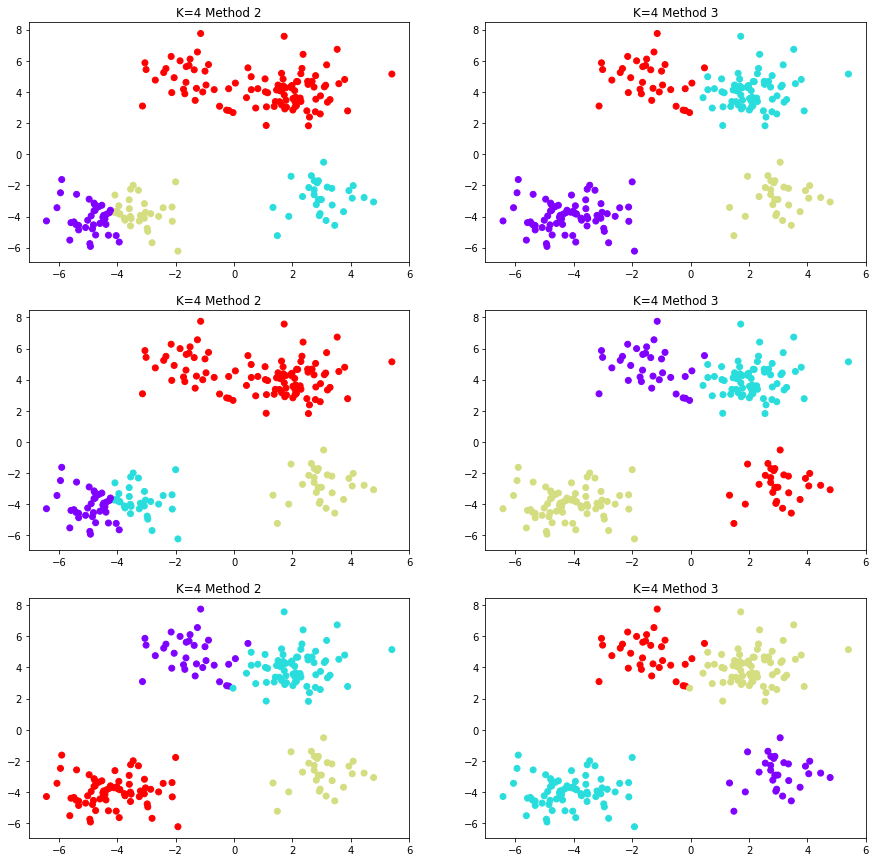

In [701]:
plt.figure(figsize=(15,15))
K=4
for i in range(1,7):
    if (i % 2) == 0:
        initial_centroids =  np.random.uniform(min(X[:,0]),max(X[:,1]),(K,2))
        centroids, idx = Kmeans(X, initial_centroids,20)
        plt.subplot(3, 2, i)
        plotdatapts(X, idx, K, f"K={K} Method 3")
    else:
        rand = np.random.randint(0,X.shape[0],K)
        initial_centroids = np.array([X[rand[0],:], X[rand[1],:],X[rand[2],:], X[rand[3],:]])
        centroids, idx = Kmeans(X, initial_centroids, 20)
        plt.subplot(3, 2, i)
        plotdatapts(X, idx, K, f"K={K} Method 2")

##### Method 2: I choose k datapoints uniformly at random from the dataset as the initialcenters, and then choose each next center to be the datapoint that maximizes the sum of (euclidean) distances from the previous datapoints.

##### Method 3: I choose the first center uniformly at random, and then choose each next center to be the datapoint that maximizes the sum of (euclidean) distances from the previous datapoints.

##### The above phenomenon from Problem B can be replicated using Method 2 and 3 of picking initial datapoints. However, Method 3 is more consistent in reproducing the same phenomenon.

## Problem D

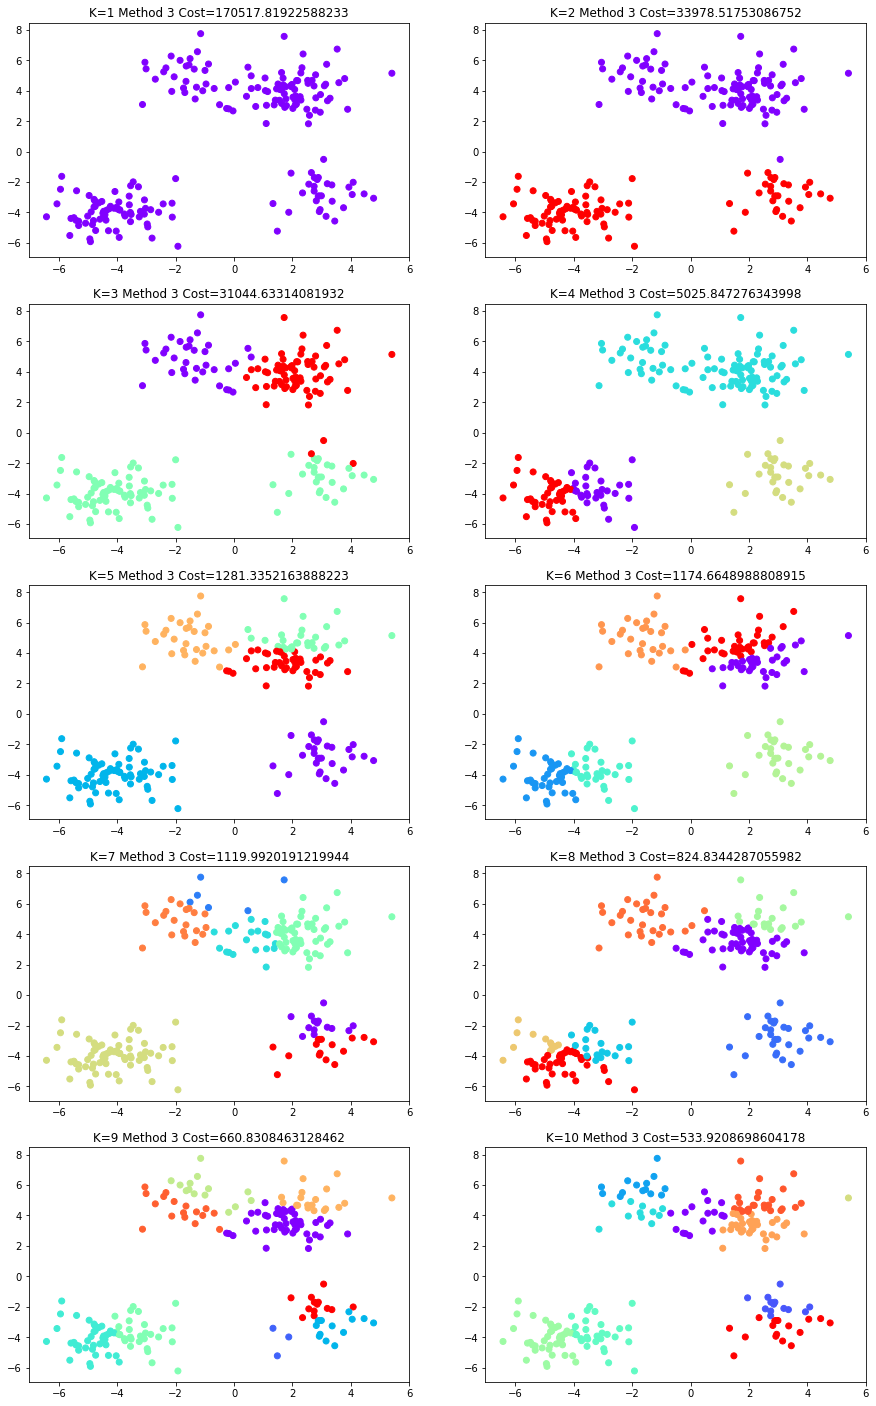

In [702]:
plt.figure(figsize=(15,25))
for i in range(1,11):
    initial_centroids =  np.random.uniform(X.min(),X.max(),(i,2))
    centroids, idx = Kmeans(X, initial_centroids,20)
    plt.subplot(5, 2, i)
    plotdatapts(X, idx, i, f"K={i} Method 3 Cost={calculate_cost(X, idx, centroids)}")

##### By ploting the above figures, we can observe that the cost is negatively correlated with the number of the clusters. That is the more we increase K, the less the cost function is. This is due to how we calculate the cost of each K-means. We calculate the cost by adding the distance difference between datapoints and the centers. Hence, the more clusters we have the more centers we have that has less distance between the centers and the datapoints and the less the cost is. A suitable number of clusters is determined by minimizing for the number of clusters and cost. In this case, a suitable number of clusters is 4.

## Problem E

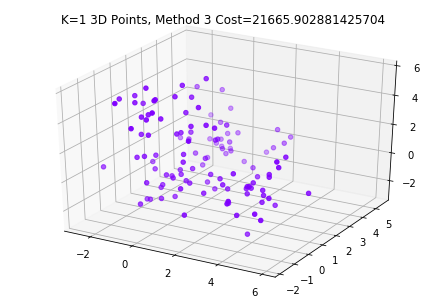

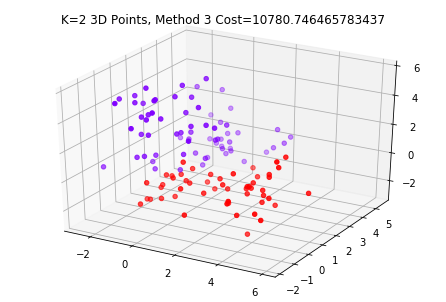

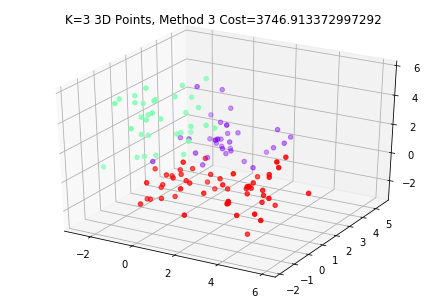

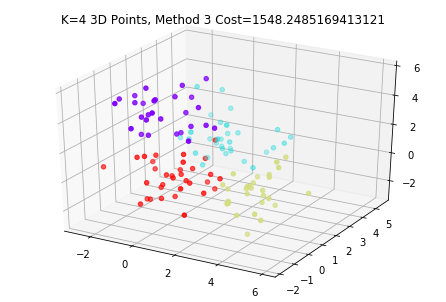

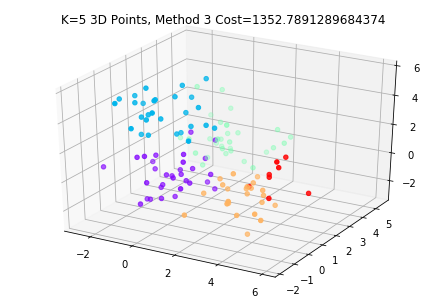

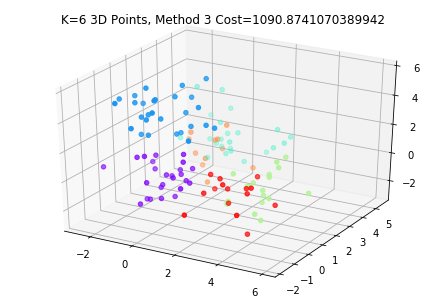

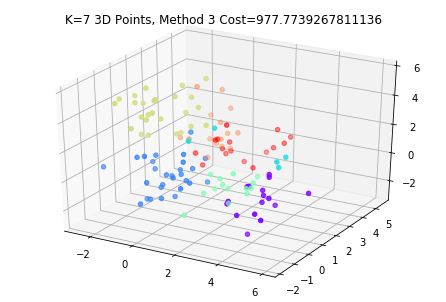

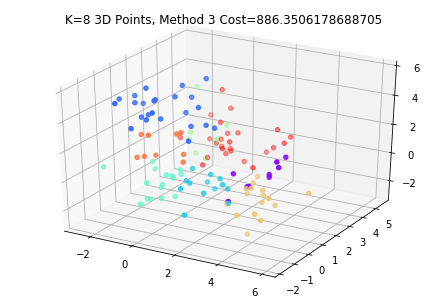

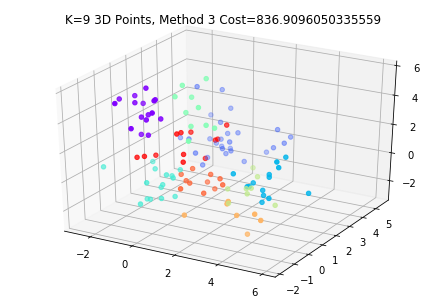

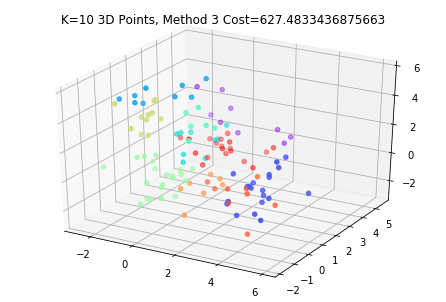

In [703]:
X = np.loadtxt('threedpoints.txt', delimiter=',')
for i in range(1,11):
    initial_centroids =  np.random.uniform(X.min(),X.max(),(i,3))
    centroids, idx = Kmeans(X, initial_centroids,20)
    plotdatapts3d(X,idx, i, f"K={i} 3D Points, Method 3 Cost={calculate_cost(X, idx, centroids)}")


It is very difficult to observe a suitable number of clusters in this dataset. It is ambiguous as to how many clusters exist in this dataset and in such cases it’s rather more useful to choose the number of clusters on the basis of end goal or the number of clusters that serve well the later down stream goal that needs to be extracted from the datasets. Although, not discussed in this course we could also use the Elbow Method. Elbow Method method looks at the percentage of variance explained as a function of the number of clusters: One should choose a number of clusters so that adding another cluster doesn't give much better modeling of the data. In this case, K=4 would be a suitable number of clusters. Although, we can't 100% confirm that visually, we can atleast that if we were to run the algorithm multiple times. The phenomenon is consistent across various uniformly picked center points. This is a similar characteristic as the previous problem which is consistency.  

## Problem F

In [704]:
X = np.loadtxt('seeds_dataset.txt', delimiter='\t')
Y = X[:,X.shape[1]-1]
X = X[:,0:X.shape[1]-1]

for i in range(1,10):
    max_ = 0
    cost = 0
    for j in range(1,100):
        initial_centroids =  np.random.uniform(X.min(),X.max(),(i,7))
        centroids, idx = Kmeans(X, initial_centroids,5)
        answer = np.average(Y == (idx+1))
        if answer > max_:
            max_ = answer
            cost = calculate_cost(X, idx, centroids)
    print(f'K={i} -> Accuracy={max_} Cost={cost}')


K=1 -> Accuracy=0.3333333333333333 Cost=57814.26833809177
K=2 -> Accuracy=0.6095238095238096 Cost=8113.402611770747
K=3 -> Accuracy=0.8809523809523809 Cost=3285.5896390740136
K=4 -> Accuracy=0.6571428571428571 Cost=8136.331107562398
K=5 -> Accuracy=0.6666666666666666 Cost=8969.451420115376
K=6 -> Accuracy=0.6523809523809524 Cost=8121.793196048954
K=7 -> Accuracy=0.6523809523809524 Cost=8113.4026117707535
K=8 -> Accuracy=0.6666666666666666 Cost=8465.984846673588
K=9 -> Accuracy=0.6 Cost=4285.1255304722945


Based on the calculated cost function, the best number of clusters for this dataset is 3. When K=3, the calculated cost function is equal to 3000, however, when K is not equal to 3 the calculated cost function is greater than 8000. Furthermore, the empirical loss of this classifier when the K=3 is the most accurate. The goal of clustering is to divide the data into “meaningful” groups. Hence, this approach could be useful when we can't visualize (i.e. 4 Dimensional or more dataset) and/or we are unfamiliar with the data. By using this method, we could use it to classify our dataset or use the information about our dataset to build a suitable 3-class classifier.

## Problem G

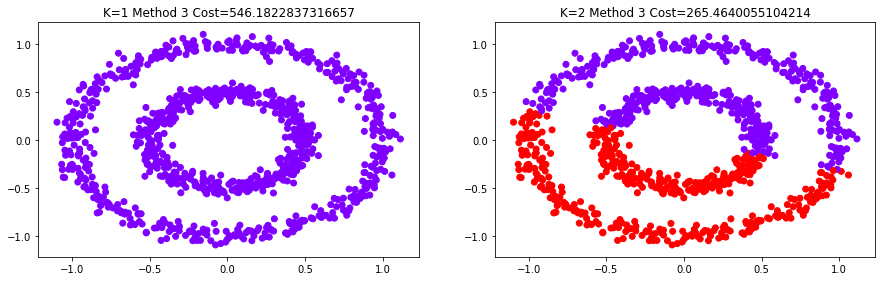

In [705]:
from sklearn.datasets import make_circles
# generate 2d classification dataset
X, y = make_circles(n_samples=1000, noise=0.05, factor=0.5)
plt.figure(figsize=(15,25))
for i in range(1,3):
    initial_centroids =  np.random.uniform(X.min(),X.max(),(i,2))
    centroids, idx = Kmeans(X, initial_centroids,20)
    plt.subplot(5, 2, i)
    plotdatapts(X, idx, i, f"K={i} Method 3 Cost={calculate_cost(X,idx, centroids)}")

The K-means failed on this dataset because it was working on minimizing the distance between the randomly picked centers and the datapoints. However, using this method no center can correctly cluster such dataset. One way to obtain a better solution would be to use Single linkage, which ensures that points that are close (or connected by a “path” of pairwise close points) will end up in the same cluster.